In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform
from scipy import signal

from IPython.display import display

In [3]:
mask = np.ones((3,3))
display(mask)
mask = mask * (1 / mask.size)
display(mask)

orig_img = data.camera()
conv_img = np.zeros(shape=orig_img.shape)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

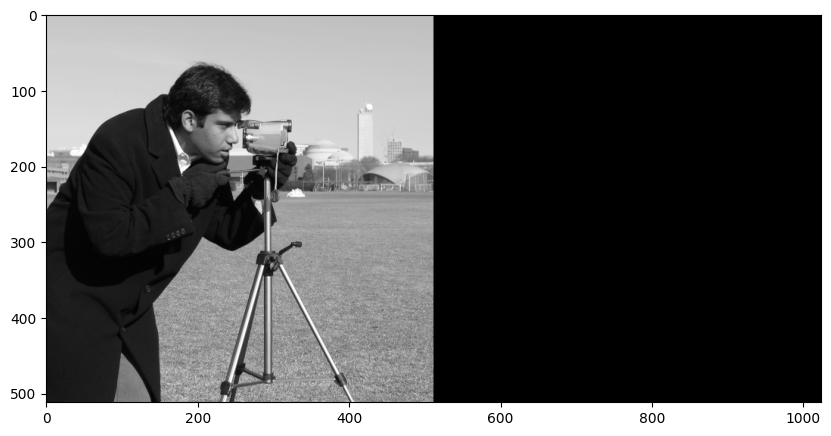

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(np.concatenate((orig_img, conv_img), axis=1), cmap='gray')

In [5]:
mask.shape[0]

3

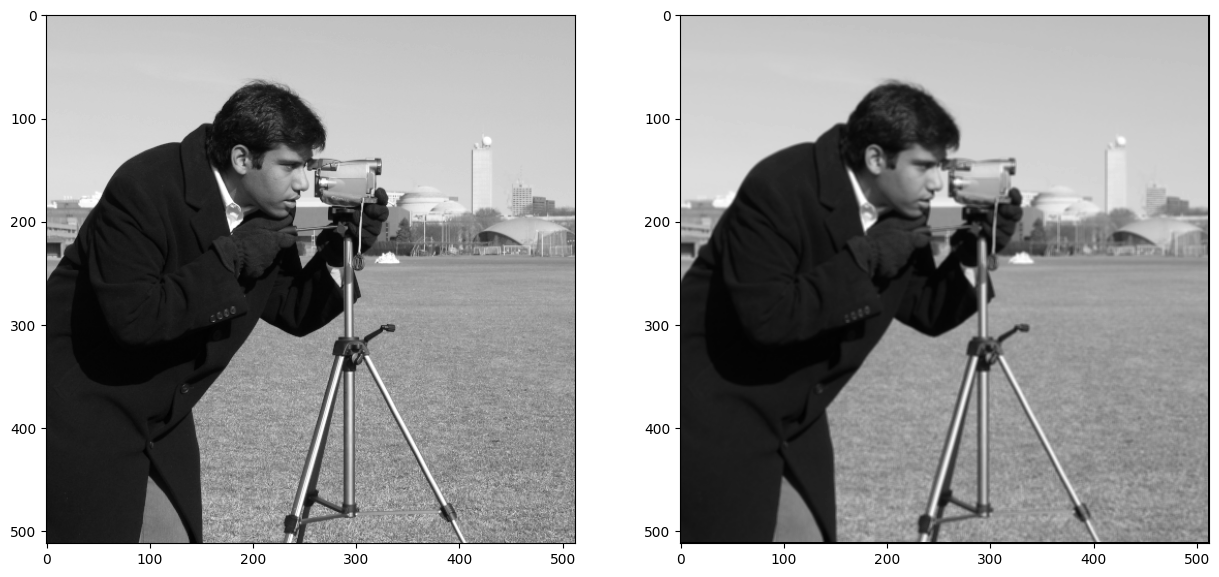

In [6]:
# Implementacia konvolucii
for i in range(0, orig_img.shape[0] - mask.shape[0]+1):
    for j in range(0, orig_img.shape[1] - mask.shape[1]+1):
        mask_img_mult = orig_img[i:i+mask.shape[0], j:j+mask.shape[1]] * mask
        conv_img[i+1, j+1] = np.sum(mask_img_mult)

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(orig_img, cmap='gray')
plt.subplot(122)
plt.imshow(conv_img.astype(dtype=np.uint8), cmap='gray')

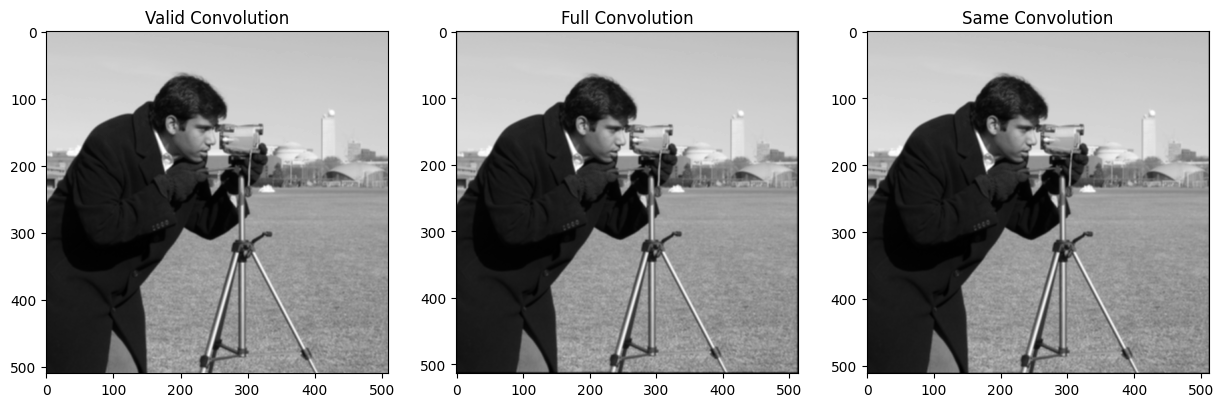

In [7]:
kernel = mask
full_conv = signal.convolve2d(orig_img, kernel, mode='full')
valid_conv = signal.convolve2d(orig_img, kernel, mode='valid')
same_conv = signal.convolve2d(orig_img, kernel, mode='same')

plt.figure(figsize=(15, 10))
plt.set_cmap('gray')
plt.subplot(131)
plt.imshow(valid_conv)
plt.title("Valid Convolution")
plt.subplot(132)
plt.title("Full Convolution")
plt.imshow(full_conv)
plt.subplot(133)
plt.title("Same Convolution")
plt.imshow(same_conv)

In [8]:
# Valid Conv -> uses only the pixels that are defined (does not add zeros)
# Full Conv -> adds zeros and takes them into account in the calculations
# Same Conv -> adds zeros so that the output size matches the original image

print(valid_conv.shape, full_conv.shape, same_conv.shape, orig_img.shape)

(510, 510) (514, 514) (512, 512) (512, 512)


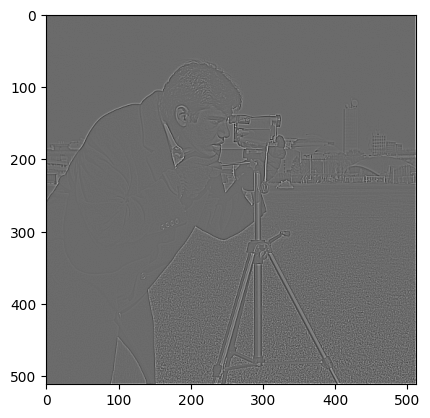

In [9]:
plt.imshow(orig_img - same_conv)

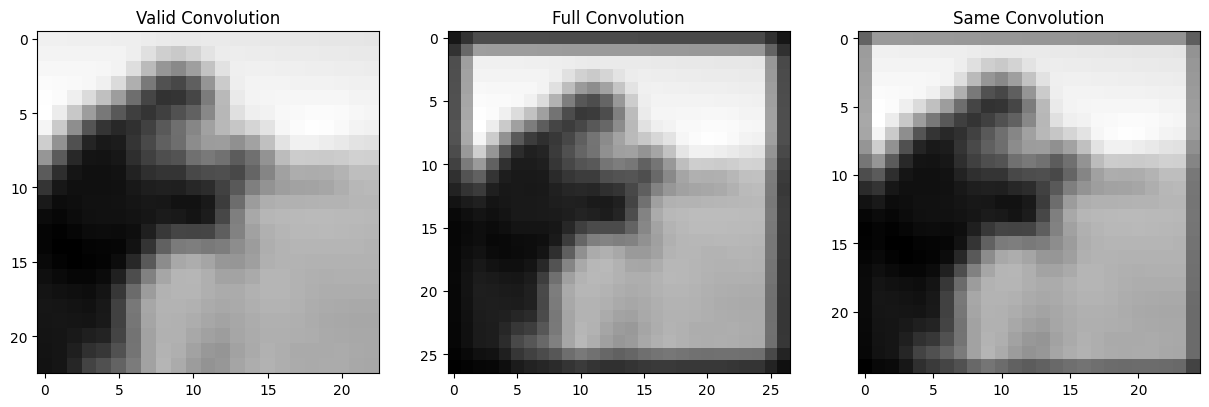

In [10]:
orig_img2 = transform.resize(orig_img, np.floor(np.array(orig_img.shape)/20).astype(np.uint8))
full_conv = signal.convolve2d(orig_img2, kernel, mode='full')
valid_conv = signal.convolve2d(orig_img2, kernel, mode='valid')
same_conv = signal.convolve2d(orig_img2, kernel, mode='same')

plt.figure(figsize=(15, 10))
plt.set_cmap('gray')
plt.subplot(131)
plt.imshow(valid_conv)
plt.title("Valid Convolution")
plt.subplot(132)
plt.title("Full Convolution")
plt.imshow(full_conv)
plt.subplot(133)
plt.title("Same Convolution")
plt.imshow(same_conv)

In [11]:
print(valid_conv.shape, full_conv.shape, same_conv.shape, orig_img2.shape)

(23, 23) (27, 27) (25, 25) (25, 25)


In [13]:
kernel = np.outer(signal.gauss_spline(3, 0.5), signal.gauss_spline(3, 0.5))
kernel = kernel / np.sum(kernel)
display(kernel)
plt.figure(figsize=(15, 10))
plt.imshow(signal.convolve2d(orig_img, kernel))

Text(0.5, 1.0, 'Sobel 2')

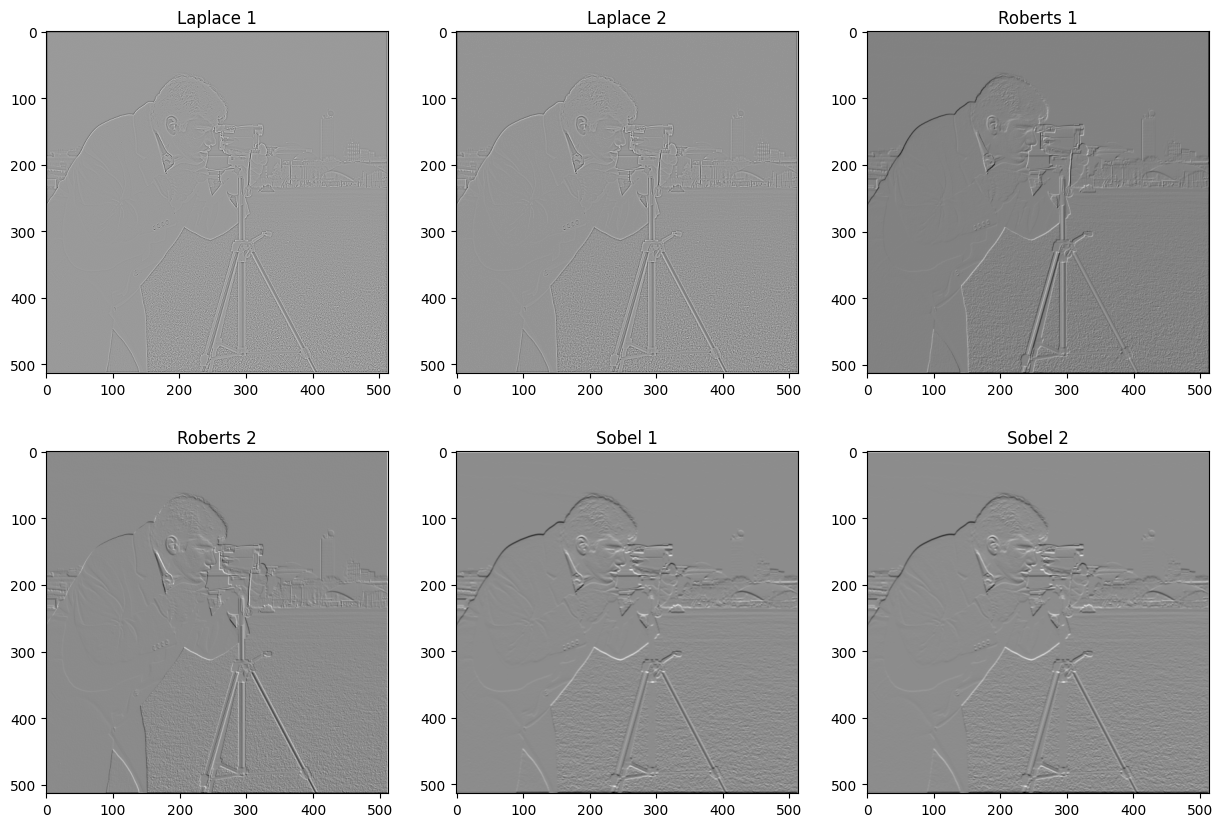

In [17]:
laplace_1_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

laplace_2_mask = np.ones((3, 3))
laplace_2_mask[1, 1] = -8

roberts_1_mask = np.array([[1, 0], [0, -1]])
roberts_2_mask = np.array(([0, 1], [-1, 0]))

sobel_1_mask = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_2_mask = np.array([[0, 1, 2], [-1, 0, 1], [-1, -2, 0]])

plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(signal.convolve2d(orig_img, laplace_1_mask))
plt.title("Laplace 1")
plt.subplot(232)
plt.imshow(signal.convolve2d(orig_img, laplace_2_mask))
plt.title("Laplace 2")
plt.subplot(233)
plt.imshow(signal.convolve2d(orig_img, roberts_1_mask))
plt.title("Roberts 1")
plt.subplot(234)
plt.imshow(signal.convolve2d(orig_img, roberts_2_mask))
plt.title("Roberts 2")
plt.subplot(235)
plt.imshow(signal.convolve2d(orig_img, sobel_1_mask))
plt.title("Sobel 1")
plt.subplot(236)
plt.imshow(signal.convolve2d(orig_img, sobel_1_mask))
plt.title("Sobel 2")

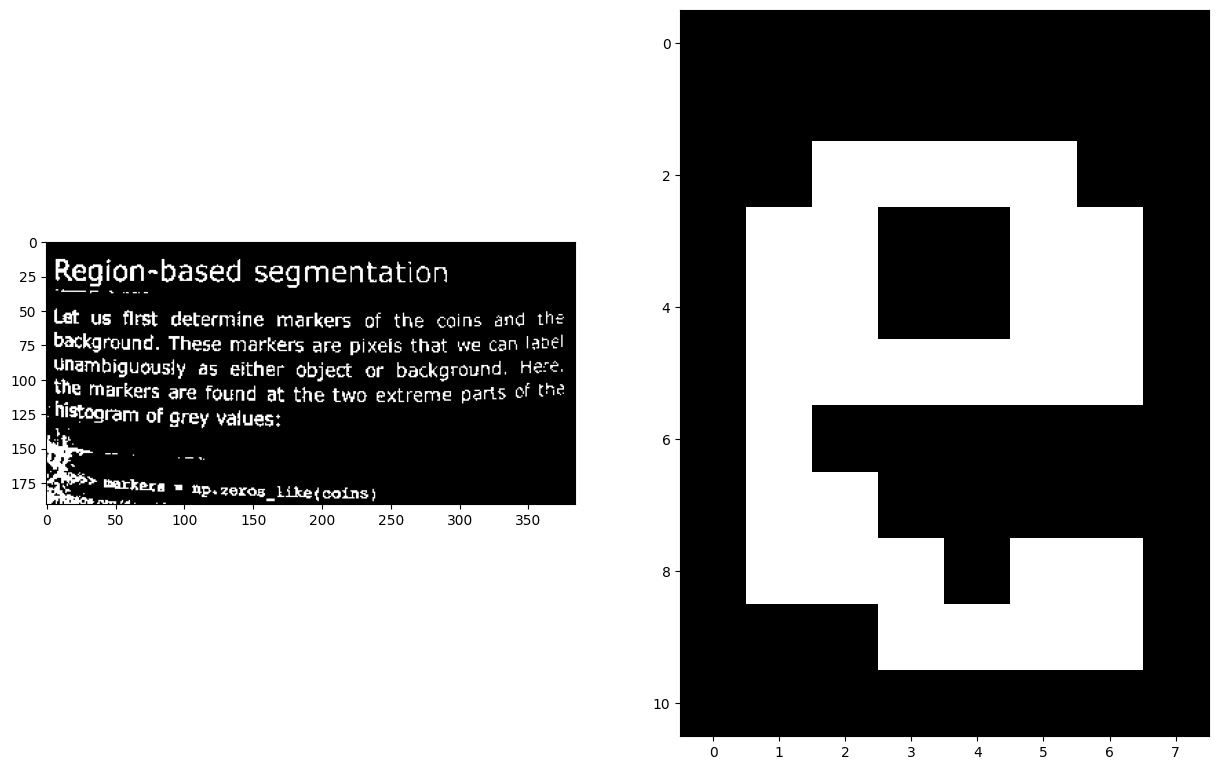

In [21]:
img_with_text = exposure.equalize_adapthist(data.page()) < 0.35
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(img_with_text)

kernel = transform.rotate(img_with_text[104:115, 63:71], 180)
plt.subplot(122)
plt.imshow(transform.rotate(kernel, 180))

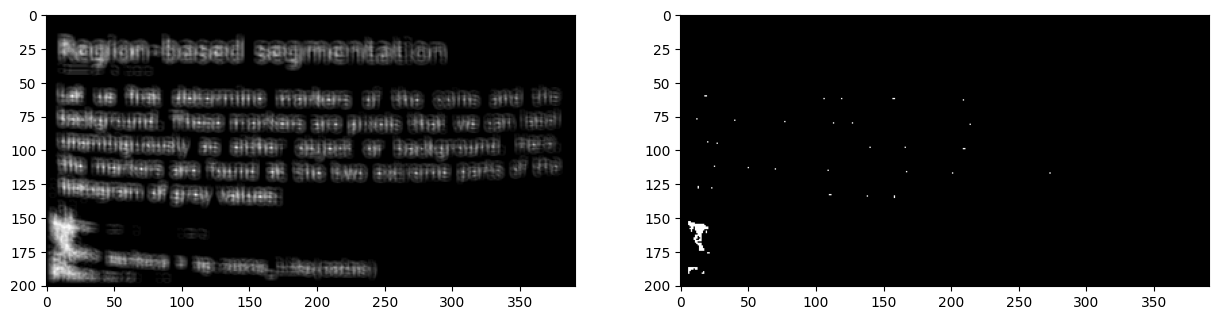

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
out = signal.convolve2d(img_with_text.astype(dtype=np.float32), kernel)
plt.imshow(out)
plt.subplot(122)
plt.imshow(out > 0.8 * np.max(out))

In [ ]:
# Konvolucia je citlive na velkost!

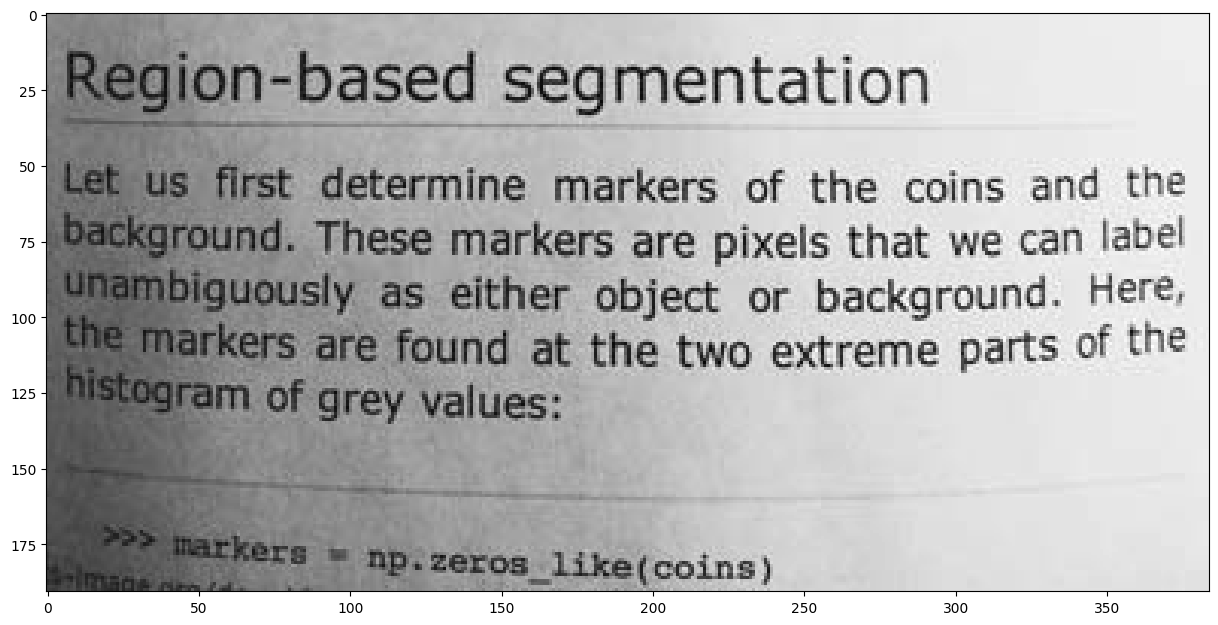

In [30]:
plt.figure(figsize=(15, 10))
plt.imshow(data.page())

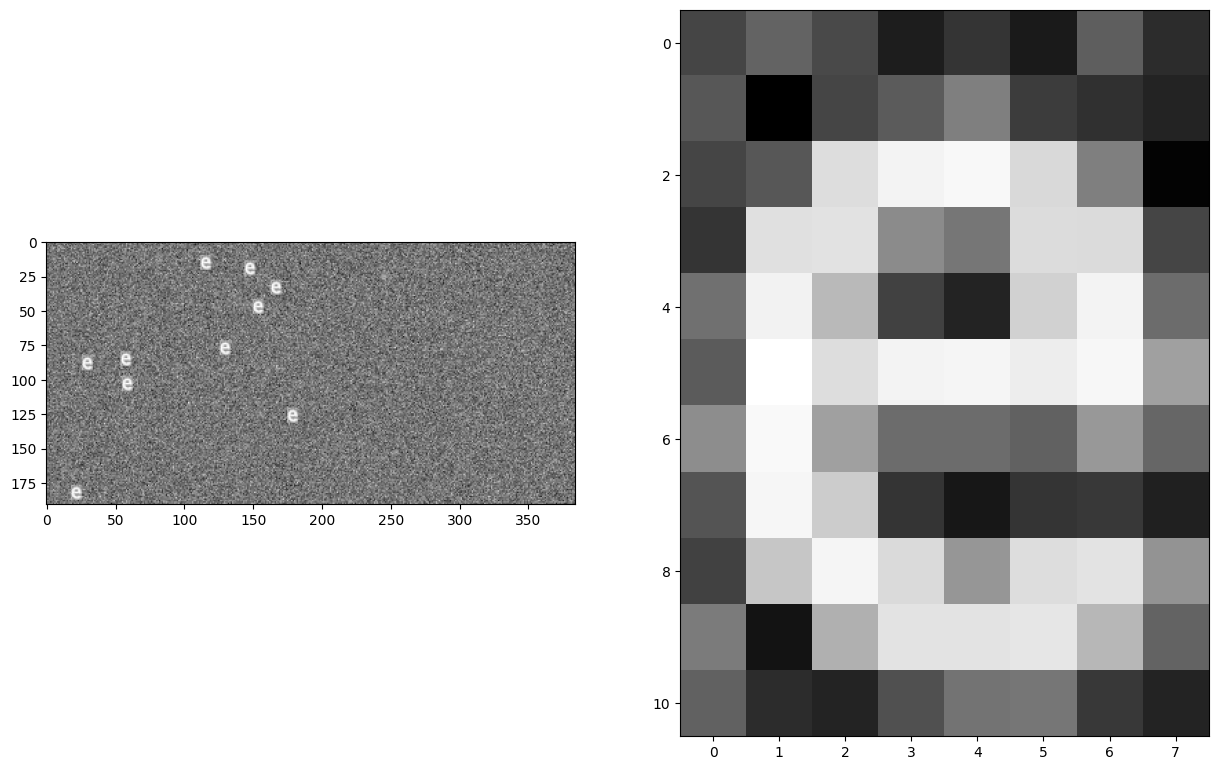

In [37]:
img_with_text = exposure.equalize_hist(data.page())
plt.figure(figsize=(15, 10))
plt.subplot(121)

kernel = 255 - transform.rotate(img_with_text[104:115, 63:71], 180) * 255
img_with_text = np.ones(shape=img_with_text.shape)*150 + np.random.randn(img_with_text.shape[0], img_with_text.shape[1]) * 20

random_positions = np.random.rand(10, 2)
random_positions[:, 0] = random_positions[:, 0] * (img_with_text.shape[0] - kernel.shape[0])
random_positions[:, 1] = random_positions[:, 1] * (img_with_text.shape[0] - kernel.shape[1])
random_positions = np.floor(random_positions).astype(np.uint8)

for rand_pos in random_positions:
    img_with_text[rand_pos[0]:rand_pos[0]+kernel.shape[0], rand_pos[1]:rand_pos[1]+kernel.shape[1]] = transform.rotate(kernel, 180)


plt.imshow(img_with_text)

plt.subplot(122)
plt.imshow(transform.rotate(kernel, 180))

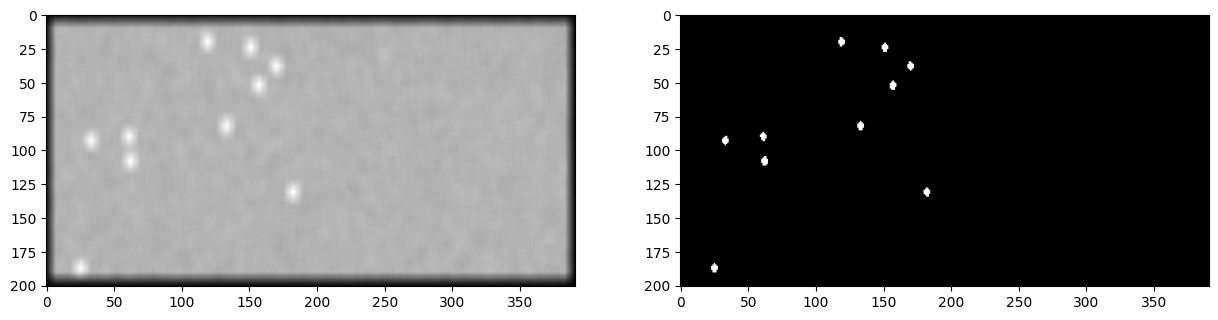

In [38]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
out = signal.convolve2d(img_with_text.astype(np.float32), kernel)
plt.imshow(out)
plt.subplot(122)
plt.imshow(out > 0.9*np.max(out))